In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


In [2]:
IPythonConsole.ipython_useSVG=True

In [3]:
res = open( "out.txt", "r" )

In [4]:
res = [  line.rstrip() for line in res ]

In [5]:
res1 = res[0]

In [6]:
res2 = res[1]

In [18]:
res3=res[2]


In [19]:
core = Chem.MolFromSmiles(res1[2:])
s1 = Chem.MolFromSmiles(res2.split(" ")[0])
s2 = Chem.MolFromSmiles(res3.split(" ")[0])



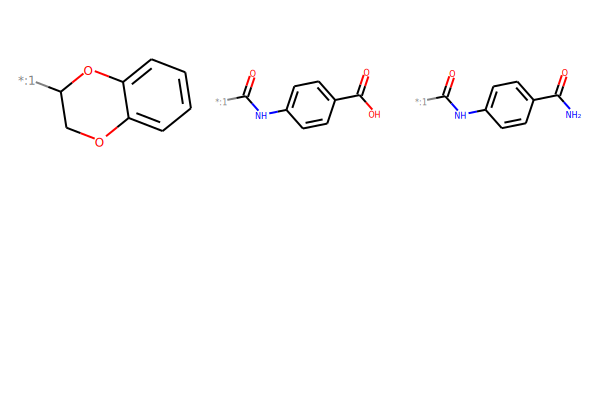

In [20]:
Draw.MolsToGridImage([core,s1,s2, s3])

In [21]:
mol = Chem.MolFromSmiles("Cc1cc(C)n(Cc2ccc(C(=O)O)o2)n1")

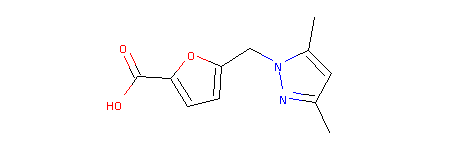

In [22]:
mol

In [38]:
from rdkit.Chem import rdMMPA

In [59]:
f=rdMMPA.FragmentMol(mol, maxCuts=1)

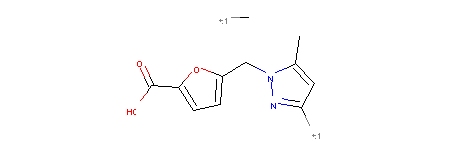

In [60]:
f[0][1]

In [61]:
f

((None, <rdkit.Chem.rdchem.Mol at 0x108cdd710>),
 (None, <rdkit.Chem.rdchem.Mol at 0x108cdd1e8>),
 (None, <rdkit.Chem.rdchem.Mol at 0x108cdd608>),
 (None, <rdkit.Chem.rdchem.Mol at 0x108cdd5b0>),
 (None, <rdkit.Chem.rdchem.Mol at 0x108cdd558>))

In [57]:
for i in f:
    print(  len(i[1]) )

TypeError: object of type 'Mol' has no len()

In [73]:
import os
from rdkit import rdBase
from rdkit import Chem
from rdkit import RDConfig
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMMPA
IPythonConsole.ipython_useSVG = True
print( rdBase.rdkitVersion )

2016.03.4


In [74]:
datadir =  os.path.join( RDConfig.RDDocsDir, "Book/data/cdk2.sdf" )
mols = [ mol for mol in Chem.SDMolSupplier( datadir ) if mol != None ]

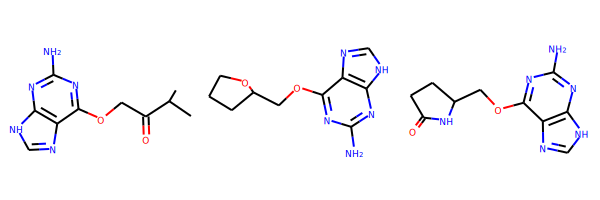

In [75]:
Draw.MolsToGridImage( mols[:3] )

In [76]:
prop = Chem.Mol.GetPropNames( mols[0] )

In [77]:
list(prop)

['Cluster',
 'MODEL.CCRATIO',
 'MODEL.SOURCE',
 'b_mmffld_Minimization_Converged-OPLS_2005',
 'id',
 'r_mmffld_Potential_Energy-OPLS_2005',
 'r_mmffld_RMS_Derivative-OPLS_2005']

In [94]:
def molFragmenter( mol, mcuts=1, idfield="id" ):
    molid = mol.GetProp( idfield )
    frags = rdMMPA.FragmentMol( mol, maxCuts=mcuts )
    for frag in frags:
        if frag[0] != None:
            frag1 = Chem.MolToSmiles( frag[0] )
            frag2 = Chem.MolToSmiles( frag[1] )
        else:
            frag1 = ""
            frag2 = Chem.MolToSmiles( frag[1] )
        res = Chem.MolToSmiles(mol)+","+molid+","+frag1+","+frag2
        print( res ) 
        

In [95]:
molFragmenter(mols[0], mcuts=1)

CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,,CC(C(=O)COc1nc(N)nc2[nH]cnc12)[*:1].C[*:1]
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,,CC(C)[*:1].Nc1nc(OCC(=O)[*:1])c2nc[nH]c2n1
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,,CC(C)C(=O)[*:1].Nc1nc(OC[*:1])c2nc[nH]c2n1
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,,CC(C)C(=O)C[*:1].Nc1nc(O[*:1])c2nc[nH]c2n1
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,,CC(C)C(=O)CO[*:1].Nc1nc(c2nc[nH]c2n1)[*:1]
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,,CC(C)C(=O)COc1nc(nc2[nH]cnc12)[*:1].N[*:1]


In [96]:
molFragmenter(mols[0], mcuts=3)

CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,,CC(C(=O)COc1nc(N)nc2[nH]cnc12)[*:1].C[*:1]
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,Nc1nc(OCC(=O)C([*:1])[*:2])c2nc[nH]c2n1,C[*:1].C[*:2]
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,C([*:1])([*:2])[*:3],C[*:1].C[*:2].Nc1nc(OCC(=O)[*:3])c2nc[nH]c2n1
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,O=C(C([*:1])[*:2])[*:3],C[*:1].C[*:2].Nc1nc(OC[*:3])c2nc[nH]c2n1
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,O=C(C[*:3])C([*:1])[*:2],C[*:1].C[*:2].Nc1nc(O[*:3])c2nc[nH]c2n1
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,O=C(CO[*:3])C([*:1])[*:2],C[*:1].C[*:2].Nc1nc(c2nc[nH]c2n1)[*:3]
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,O=C(COc1nc(nc2[nH]cnc12)[*:3])C([*:1])[*:2],C[*:1].C[*:2].N[*:3]
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,CC([*:1])[*:2],C[*:1].Nc1nc(OCC(=O)[*:2])c2nc[nH]c2n1
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,CC(C(=O)[*:2])[*:1],C[*:1].Nc1nc(OC[*:2])c2nc[nH]c2n1
CC(C)C(=O)COc1nc(N)nc2[nH]cnc12,ZINC03814457,CC(C(=O)C[*:2])[*